In [1]:
import SimEx
from SimEx import *
import matplotlib.pyplot as plt
import sys

initializing ocelot...



In [2]:
prop_path = '/gpfs/exfel/data/user/juncheng/SPBProject/data/simulation/2nip_9fs/prop_5kev_9s_Yoon2016_source.h5'
source_analysis = XFELPhotonAnalysis(input_path=prop_path)


 Start initialization.

 Loading wavefront from /gpfs/exfel/data/user/juncheng/SPBProject/data/simulation/2nip_9fs/prop_5kev_9s_Yoon2016_source.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (150, 150, 651)

 Masking NANs.
 ... done.



 Plotting total power.
Pulse energy 0.00037 J


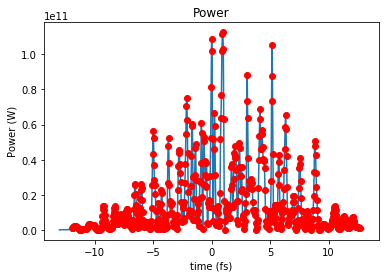

In [3]:
xs_mf, int0_mean = source_analysis.plotTotalPower()

In [4]:
dt = (xs_mf.max() - xs_mf.min())/(len(xs_mf) - 1)
dt = dt*1e15
# print (dt,'fs')

## For GROMACS

In [11]:
with open("gromacs.txt", "w") as fh:
    for i,data in enumerate(zip(xs_mf, int0_mean)):
        fh.write('{:.5e} {:.5e}\n'.format(data[0],data[1]))

## For Cretin

In [43]:
with open("example.txt", "w") as fh:
    for i,data in enumerate(zip(xs_mf*1e15, int0_mean)):
#         if i == 5:
#             break
        fh.write('history '+str(i)+' {:.5e}'.format(data[1])+' 1e-15\n')
        fh.write('tv '+str(data[0])+' 1\n')
        fh.write('tv '+str(data[0]+dt)+' 1\n')